<a href="https://colab.research.google.com/github/Chaitali2004/House-Prices-Advance-Regression-techq/blob/main/house_prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
!pip install -q scikit-learn pandas matplotlib seaborn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics import mean_squared_error, r2_score

In [8]:
from google.colab import files
uploaded = files.upload()  # Upload 'train.csv'

df = pd.read_csv("train.csv")
df.head()


Saving train.csv to train (2).csv


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [9]:
df.info()
df.describe()
df.isnull().sum().sort_values(ascending=False)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

,0
PoolQC,1453
MiscFeature,1406
Alley,1369
Fence,1179
MasVnrType,872
...,...
MoSold,0
YrSold,0
SaleType,0
SaleCondition,0


<Axes: xlabel='GrLivArea', ylabel='SalePrice'>

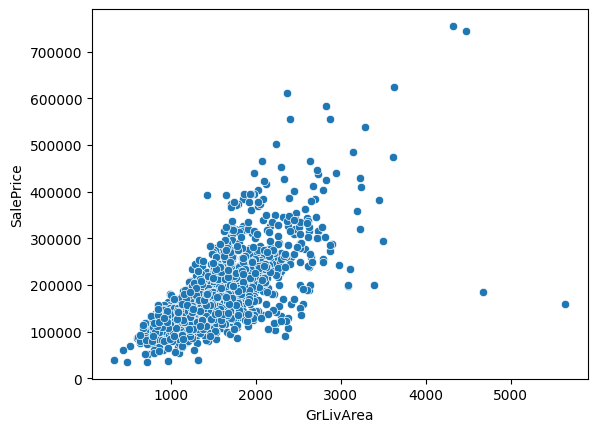

In [10]:
sns.scatterplot(x=df['GrLivArea'], y=df['SalePrice'])



<Axes: xlabel='Neighborhood', ylabel='SalePrice'>

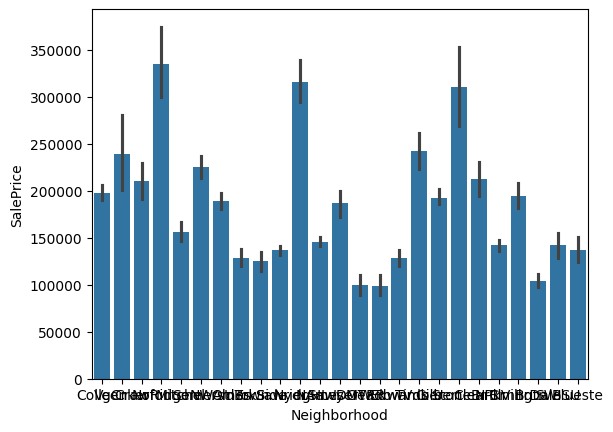

In [ ]:
sns.barplot(x='Neighborhood', y='SalePrice', data=df)

<Axes: xlabel='OverallQual', ylabel='SalePrice'>

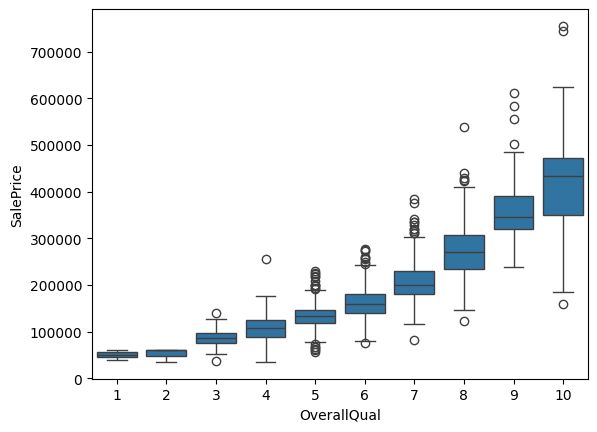

In [ ]:
sns.boxplot(x=df['OverallQual'], y=df['SalePrice'])

In [11]:
# Drop columns with too many missing values
df = df.dropna(thresh=len(df) * 0.7, axis=1)

# Drop ID column
df.drop(columns=["Id"], inplace=True)

# Separate target
X = df.drop("SalePrice", axis=1)
y = df["SalePrice"]

# Column types
num_cols = X.select_dtypes(include=["int64", "float64"]).columns.tolist()
cat_cols = X.select_dtypes(include=["object"]).columns.tolist()

# Pipelines
num_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

cat_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(handle_unknown="ignore", sparse_output=False))
])

# Full preprocessor
preprocessor = ColumnTransformer([
    ("num", num_pipeline, num_cols),
    ("cat", cat_pipeline, cat_cols)
])

# Fit and transform the features
X_processed = preprocessor.fit_transform(X)

# Confirm shape
print("Processed feature shape:", X_processed.shape)


Processed feature shape: (1460, 266)


/tmp/ipython-input-11-186743891.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=["Id"], inplace=True)


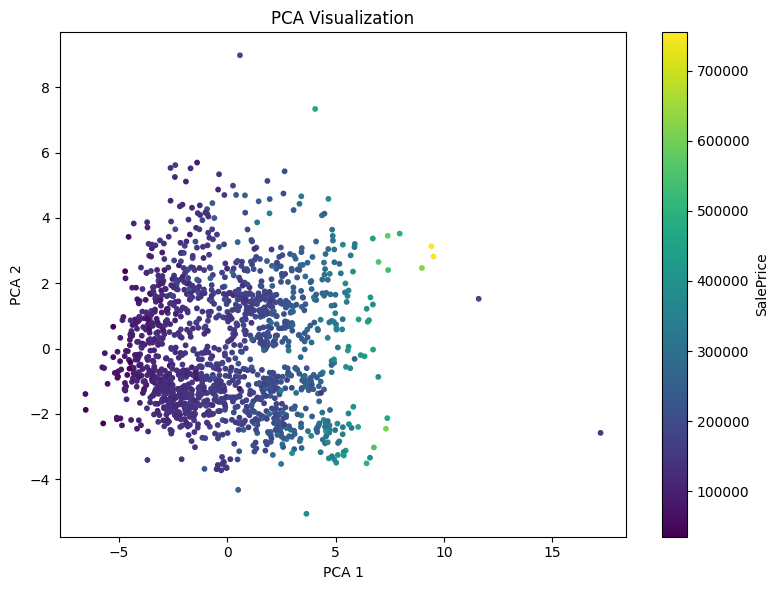

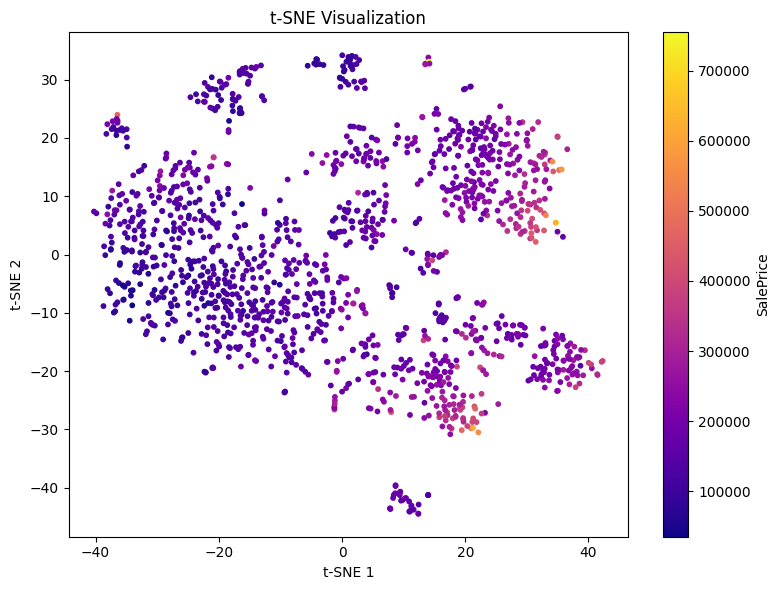

In [12]:
# PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_processed)

plt.figure(figsize=(8, 6))
plt.title("PCA Visualization")
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', s=10)
plt.colorbar(label="SalePrice")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.tight_layout()
plt.show()

# t-SNE
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
X_tsne = tsne.fit_transform(X_processed)

plt.figure(figsize=(8, 6))
plt.title("t-SNE Visualization")
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='plasma', s=10)
plt.colorbar(label="SalePrice")
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")
plt.tight_layout()
plt.show()


In [13]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

# Model and param search
model = RandomForestRegressor(random_state=42)
param_grid = {
    "n_estimators": [100, 200, 300],
    "max_depth": [10, 20, 30, None],
    "min_samples_split": [2, 5, 10]
}

search = RandomizedSearchCV(model, param_grid, n_iter=10, cv=3,
                            scoring="neg_mean_squared_error", random_state=42)
search.fit(X_train, y_train)
best_model = search.best_estimator_


In [14]:
# Predictions & metrics
y_pred = best_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"R² Score: {r2:.4f}")


Mean Squared Error: 827319120.25
Root Mean Squared Error: 28763.16
R² Score: 0.8921


In [15]:
# ridge Regression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

ridge = Ridge(alpha=1.0)  # Tune alpha
ridge.fit(X_train, y_train)

y_pred_ridge = ridge.predict(X_test)

print("Ridge RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_ridge)))
print("Ridge R²:", r2_score(y_test, y_pred_ridge))


Ridge RMSE: 29208.226007078636
Ridge R²: 0.8887765078776952


In [17]:
#lasso regression
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.01, max_iter=10000)  # alpha needs tuning
lasso.fit(X_train, y_train)

y_pred_lasso = lasso.predict(X_test)

print("Lasso RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lasso)))
print("Lasso R²:", r2_score(y_test, y_pred_lasso))


Lasso RMSE: 28423.737614593196
Lasso R²: 0.8946708603831964


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.801e+10, tolerance: 6.967e+08
  model = cd_fast.enet_coordinate_descent(
